In [17]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [18]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [20]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [21]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [22]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=90)

C:\Users\Aditi.vjain\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


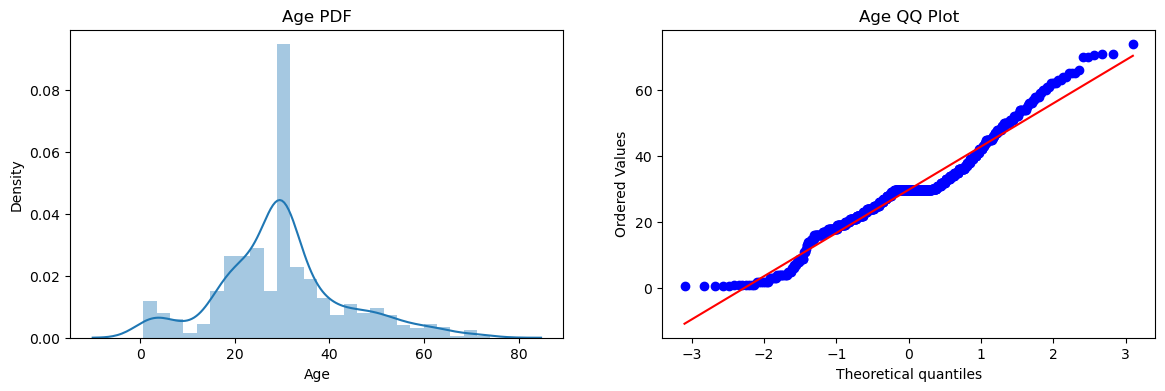

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Aditi.vjain\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


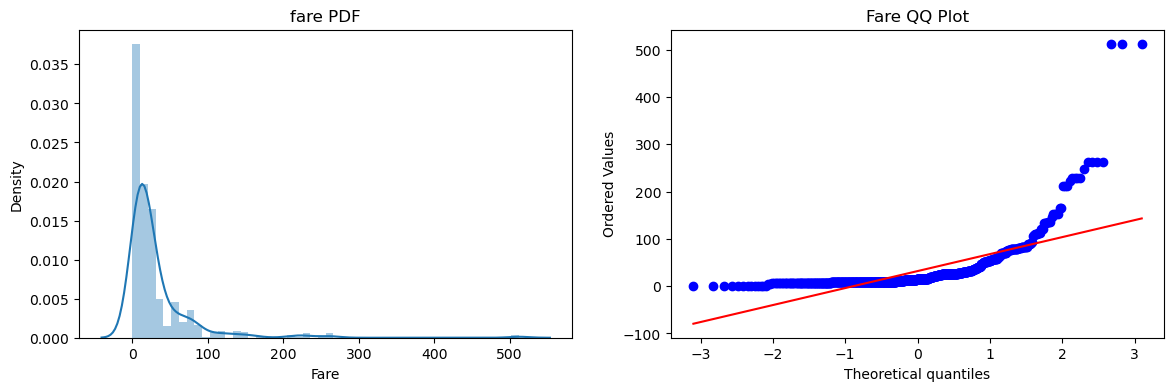

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [26]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()

In [27]:
lr.fit(X_train,y_train)
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
y_pred_lr=lr.predict(X_test)
y_pred_dtc=dtc.predict(X_test)

In [29]:
print('Logistic reg acc score',accuracy_score(y_test,y_pred_lr))
print('Decision tree acc score',accuracy_score(y_test,y_pred_dtc))

Logistic reg acc score 0.6983240223463687
Decision tree acc score 0.6536312849162011


In [34]:

print("LR",np.mean(cross_val_score(lr,X,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(dtc,X,y,scoring='accuracy',cv=10)))

LR 0.6589013732833957
DT 0.6588264669163545


In [30]:
trf=FunctionTransformer(func=np.log1p)

In [31]:
X_train_trans=trf.fit_transform(X_train)
X_test_trans=trf.fit_transform(X_test)


In [32]:
lr.fit(X_train_trans,y_train)
dtc.fit(X_train_trans,y_train)
y_pred_lr=lr.predict(X_test_trans)
y_pred_dtc=dtc.predict(X_test_trans)
print('Logistic reg acc score',accuracy_score(y_test,y_pred_lr))
print('Decision tree acc score',accuracy_score(y_test,y_pred_dtc))

Logistic reg acc score 0.6815642458100558
Decision tree acc score 0.6536312849162011


In [33]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6610736579275905


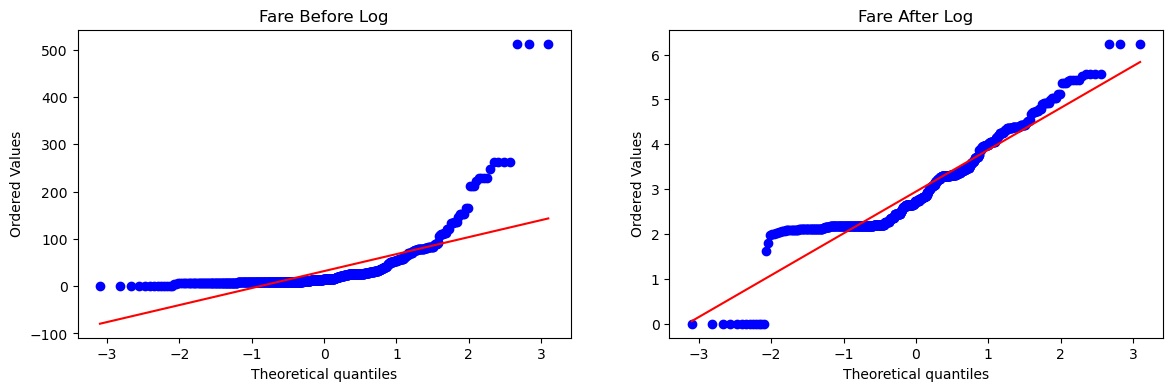

In [36]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_trans['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

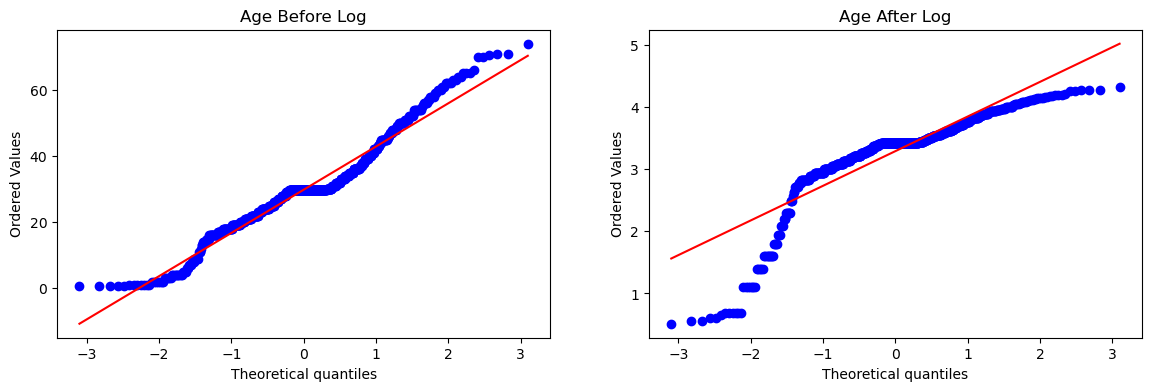

In [38]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_trans['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [39]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


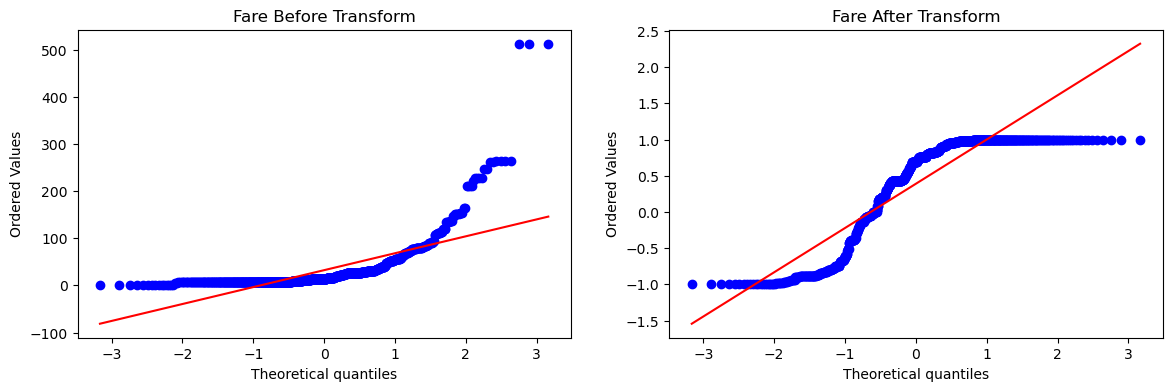

In [40]:
apply_transform(np.sin)